# MA934  Numerical Methods - Workbook 2

In [1]:
using Plots
using Distributions
pyplot()
include("KVPair.jl")
include("LList.jl")
include("FTree.jl")

buildFTree (generic function with 1 method)

## Question 1: Linear search using a linked list

The file KVPair.jl defines a simple data structure to represent an (Int64, Float64) key-value pair. 

The file LList.jl defines a linked list that stores a KVPair at each node. Many languages have a keyword NULL. A pointer to any object can take the value NULL to indicate that it doesn't point to anything. NULL is often used to denote the end of a list, the leaves of a tree etc. Julia does not support NULL pointers. This causes a difficulty in implementing recursive data structures. Instead Julia provides a parametric data type Nullable{T} to represent missing values. It is possible to use Nullable types to define recursive data structures although some of the resulting definitions are a bit clumsy. I'm not sure that this is the canonical way to implement structural recursion in Julia. 

The following points are important:

* if a variable has type Nullable{T} then it can either contain a value of type T or nothing (ie a missing value). 
* the function isnull(x) checks whether a nullable type x has a value or not. 
* the function get(x) returns the actual value (of type T) contained in a nullable type x.

Much more information can be found at https://docs.julialang.org/en/stable/manual/types/

The function 

> buildLList(dataArray::Array{KVPair, 1})

takes an array of KVPair objects as input and returns an LList containing these KVPairs. This is illustrated in the code below.

In [16]:
array = Array{KVPair}(0)

for i in 1:5
    push!(array, KVPair(i,rand()))
end
 
list = buildLList(array)

Nullable{LList}(LList(KVPair(1, 0.146914), LList(KVPair(2, 0.848976), LList(KVPair(3, 0.354473), LList(KVPair(4, 0.212675), LList(KVPair(5, 0.149064), #NULL))))))

1.Write a recursive function that traverses the list and prints out the key-value pairs stored in it. Check that your function works.

In [17]:
function list_printer(list::Nullable{LList})
    node = get(list)
    print("(key,value) = ", node.data.key," , " ,node.data.value)
    print("\n")
#     @show node.data.key
#     @show node.data.value
    
    if( !isnull(node.next) )
        return list_printer(node.next)
    else
        return 
    end
end

list_printer(list)

# => it works

(key,value) = 1 , 0.1469135189823314
(key,value) = 2 , 0.8489763695135368
(key,value) = 3 , 0.3544728148183529
(key,value) = 4 , 0.21267475516772882
(key,value) = 5 , 0.14906360358337434


2.Write a function search(list::Nullable{LList}, k::Int64) that searches an LList for the key k and returns the corresponding KVPair if it is present and a Nullable{KVPair} otherwise. Verify that your function works.

In [18]:
function list_search(list::Nullable{LList},k::Int64)
    if isnull(list)
        print("It is Nullable{KVPair} \n")
    else 
        if get(list).data.key==k
            print("KVPair: ", (get(list).data.key ,get(list).data.value))
#             return get(list).data.value
        else 
            return list_search(get(list).next,k)
        end
    end
end

k=6
list_search(list,k)

k=2
list_search(list,k)

# =>it works

It is Nullable{KVPair} 
KVPair: (2, 0.8489763695135368)

3.Use Julia's @timed macro to measure how the typical computational cost of your search() function grows with the length of the list.

In [19]:
function list_generator(len::Int)
    g_array=Array(KVPair,0)
    for i = 1:len
        g=KVPair(i,rand())
        push!(g_array,g)
    end
    return buildLList(g_array)
end

list_generator (generic function with 1 method)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{KVPair}, ::Int64) at .\deprecated.jl:57
 [3] list_generator(::Int64) at .\In[19]:2
 [4] include_string(::String, ::String) at .\loading.jl:515
 [5] include_string(::Module, ::String, ::String) at C:\Users\okokq\.julia\v0.6\Compat\src\Compat.jl:478
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\okokq\.julia\v0.6\IJulia\src\execute_request.jl:154
 [7] eventloop(::ZMQ.Socket) at C:\Users\okokq\.julia\v0.6\IJulia\src\eventloop.jl:8
 [8] (::IJulia.##14#17)() at .\task.jl:335
while loading In[20], in expression starting on line 1


KVPair: (1, 0.5709290570906529)KVPair: (2, 0.9687387510494303)KVPair: (1, 0.5806474462248641)KVPair: (2, 0.42455129246957557)KVPair: (1, 0.9904005447669963)KVPair: (1, 0.7743043370302858)KVPair: (2, 0.7392886857828549)KVPair: (1, 0.4397424095744149)KVPair: (1, 0.4982264696566281)KVPair: (1, 0.41998918907372107)KVPair: (1, 0.4521870940335171)KVPair: (1, 0.5814175955229632)KVPair: (1, 0.4577799942750429)KVPair: (2, 0.858834127249805)KVPair: (1, 0.7651853108502611)KVPair: (1, 0.08255007856106222)KVPair: (2, 0.1713543605809542)KVPair: (2, 0.14398509613000554)KVPair: (1, 0.04892617955679168)KVPair: (1, 0.8574888700101095)KVPair: (1, 0.7541159280516994)KVPair: (1, 0.1544319633273874)KVPair: (2, 0.346740268263219)KVPair: (2, 0.08949074993899653)KVPair: (1, 0.02297003683874488)KVPair: (1, 0.09729473339071837)KVPair: (2, 0.8337632052437589)KVPair: (2, 0.8955823098351468)KVPair: (1, 0.5937767184269918)KVPair: (1, 0.8875771539842203)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{Float64}, ::Int64) at .\deprecated.jl:57
 [3] include_string(::String, ::String) at .\loading.jl:515
 [4] include_string(::Module, ::String, ::String) at C:\Users\okokq\.julia\v0.6\Compat\src\Compat.jl:478
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\okokq\.julia\v0.6\IJulia\src\execute_request.jl:154
 [6] eventloop(::ZMQ.Socket) at C:\Users\okokq\.julia\v0.6\IJulia\src\eventloop.jl:8
 [7] (::IJulia.##14#17)() at .\task.jl:335
while loading In[20], in expression starting on line 5
Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{KVPair}, ::Int64) at .\deprecated.jl:57
 [3] list_generator(::Int64) at .\In[19]:2
 [4] macro expansion at .\In[20]:10 [inlined]
 [5] anonymous at .\<missing>:?
 [6] include_string(::String, ::String) at .\loading.jl:515
 [7] include_string(::Module, ::String, ::String) at C:\Users\okokq\.julia\v0.6\Compat\src\Compat.jl:478
 [

KVPair: (4, 0.6548069454773919)KVPair: (3, 0.6652251402149814)KVPair: (1, 0.5112773094207796)KVPair: (4, 0.9072918186643659)KVPair: (3, 0.8509140802623747)KVPair: (4, 0.8228522058176662)KVPair: (3, 0.02120365125812973)KVPair: (4, 0.4674442083513264)KVPair: (4, 0.5061535283219458)KVPair: (3, 0.8666047597547561)KVPair: (2, 0.11064250375876128)KVPair: (1, 0.55591743013084)KVPair: (3, 0.05932685401997606)KVPair: (1, 0.6372248386466619)KVPair: (2, 0.9159215228058772)KVPair: (3, 0.6728207282440126)KVPair: (4, 0.5516458018922556)KVPair: (2, 0.7055246256726999)KVPair: (4, 0.7000917688179484)KVPair: (4, 0.025447740638150584)KVPair: (4, 0.8343136367039885)KVPair: (3, 0.288678021171787)KVPair: (3, 0.3977782885373178)KVPair: (1, 0.9677996903670205)KVPair: (2, 0.32019862868092663)KVPair: (2, 0.26661449388341496)KVPair: (3, 0.23400878694647553)KVPair: (4, 0.8930996664951438)KVPair: (3, 0.3230465877997948)KVPair: (2, 0.9998380659533401)KVPair: (1, 0.23650127980940905)KVPair: (4, 0.5964770192305218)KV

KVPair: (366, 0.10018419792762256)KVPair: (854, 0.8654530777093832)KVPair: (358, 0.04462050697652642)KVPair: (1012, 0.6341597689232146)KVPair: (532, 0.5506301136205618)KVPair: (909, 0.6751057094447941)KVPair: (627, 0.4330316610900664)KVPair: (519, 0.13470016444561717)KVPair: (732, 0.4636451417896106)KVPair: (449, 0.8659261618281229)KVPair: (437, 0.4322673179106318)KVPair: (767, 0.3819802850440326)KVPair: (198, 0.09197947860055966)KVPair: (647, 0.9231945324797821)KVPair: (1203, 0.9917536984484314)KVPair: (1974, 0.39563531316990797)KVPair: (1305, 0.8063302236964014)KVPair: (398, 0.09613617619073711)KVPair: (1413, 0.8437556658855176)KVPair: (1002, 0.6559663783383671)KVPair: (931, 0.8034274304344706)KVPair: (145, 0.3591107019827453)KVPair: (1689, 0.060020869689224376)KVPair: (388, 0.6736512602447466)KVPair: (939, 0.7932189016659019)KVPair: (1371, 0.885483028575367)KVPair: (792, 0.4131648197871016)KVPair: (2022, 0.0795794517402435)KVPair: (156, 0.3263895342652432)KVPair: (1128, 0.4940933894


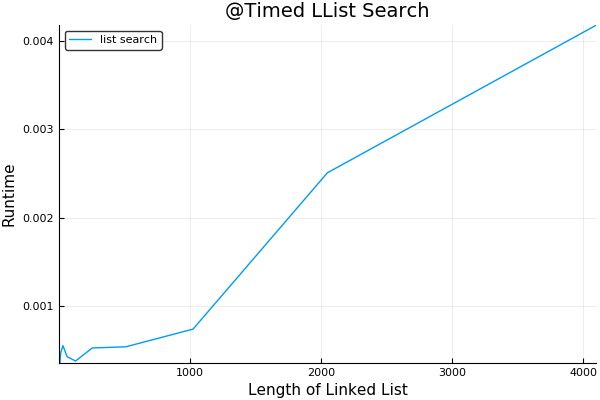

In [20]:
list=list_generator(5)

repeat=30
width=2.^(1:12)
times=Array(Float64,0)
repeat_T=zeros(repeat)

for len in width
    for j = 1:repeat
        list=list_generator(len)
        runtime = @timed list_search(list, rand(1:len))
        repeat_T[j] = runtime[2]
    end
    push!(times, mean(repeat_T))
end

Plots.plot(width,times, title="@Timed LList Search",
    xlabel="Length of Linked List",
    ylabel="Runtime",
    label="list search")

**Conclustion: The computational cost of search function grows linearly

## Question 2: Interval membership

The problem of interval membership is the following: given a set of contiguous intervals, 

$\left\{[x_0, x_1), [x_1, x_2), \ldots, [x_{n-2}, x_{n-1}), [x_{n-1}, x_n)\right\}$

spanning the interval $[x_1, x_n)$ and given a random number $x \in [x_1, x_n)$, determine the interval in which $x$ lies. The standard numerical algorithm for stochastic simulation of continuous-time Markov processes (eg birth-death process, contact process, SIR model etc) requires solving an interval membership problem at each time step. It is therefore important to be able to solve it efficiently. Note, we cannot assume that all intervals are the same length.

We can solve the interval membership problem with $n$ interval by a variant of linear search in $O(n)$ time. We will demonstrate below that it can be solved in $O(\log\, n)$ time using a variant of a data structure known as a Fenwick tree.

**1)** Use Julia's random number generator to generate $n$ random interval lengths, $y_1, y_2, \ldots, y_n$ between 0 and 1 as shown: 

In [21]:
# Set number of intervals
n=10
# Seed for random number generator. 
# You should choose your own seed so that everyone does not end up with the same random sequences
seed = 1235 
# Initialise the random number generator
rng = MersenneTwister(seed)
# Generate a sample of n uniform random numbers in the interval [0,1]
X = rand(rng, n)

10-element Array{Float64,1}:
 0.0951588
 0.270898 
 0.906315 
 0.833585 
 0.945055 
 0.443669 
 0.904577 
 0.941598 
 0.0375897
 0.996082 

The corresponding interval membership problem is constructed from the partial sums:
$$x_i = \sum_{j=1}^i y_j, \ \ \ \ \ i=1,2,\ldots n.$$ 
Using the objects defined in KVPair.jl and LList.jl, create an array of key-value pairs, $(i, x_i)$, associating each interval with the corresponding partial sum and store this array in a linked list. Print the list for a small value of $n$to verify that it works.

In [37]:
function cum_generatoer(size::Int, rng)
    # Set number of intervals
    n=size

    # Generate a sample of n uniform random numbers in the interval [0,1]
    X = rand(rng, n);

    # Generate array of key-values
    pairs = Array(KVPair,0)
    cumsum = zeros(n+1)
    for i in 1:n
        cumsum[i+1] = cumsum[i] + X[i]
        push!(pairs, KVPair(i, cumsum[i+1]))
    end

    return buildLList(pairs), cumsum
end

cum_generatoer (generic function with 1 method)

In [38]:
cum_generator(3,rng)

# => it works

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{KVPair}, ::Int64) at .\deprecated.jl:57
 [3] cum_generator(::Int64, ::MersenneTwister) at .\In[22]:6
 [4] include_string(::String, ::String) at .\loading.jl:515
 [5] include_string(::Module, ::String, ::String) at C:\Users\okokq\.julia\v0.6\Compat\src\Compat.jl:478
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\okokq\.julia\v0.6\IJulia\src\execute_request.jl:154
 [7] eventloop(::ZMQ.Socket) at C:\Users\okokq\.julia\v0.6\IJulia\src\eventloop.jl:8
 [8] (::IJulia.##14#17)() at .\task.jl:335
while loading In[38], in expression starting on line 1


Nullable{LList}(LList(KVPair(1, 0.0951588), LList(KVPair(2, 0.366057), LList(KVPair(3, 1.27237), #NULL))))

**2)** Modify the search function you wrote above to write a recursive function

$$\text{intervalmembership(list::Nullable{LList}, x::Float64)}$$

that takes the LList containing the list of partial sums and a random Float64 in the range $[0, x_n]$ as inputs and returns the KVPair corresponding to the interval in which $x$ lies. Verify that it works for small values of $n$ and use Julia's @timed macro to measure how the typical computational cost grows with $n$. 

In [39]:
function intervalmembership(Y::Nullable{LList}, x::Float64)
    if isnull(Y)
        print("Error: out of range")
    else 
        if get(Y).data.value>x
            return get(Y).data
        else 
            return intervalmembership(get(Y).next,x)
        end
    end
end

intervalmembership (generic function with 1 method)

In [40]:
YY=cum_generator(4,rng)
@show YY
k=0.35
intervalmembership(YY,k)
# => It works

YY = Nullable{LList}(LList(KVPair(1, 0.0951588), LList(KVPair(2, 0.366057), LList(KVPair(3, 1.27237), LList(KVPair(4, 2.10596), #NULL)))))


Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{KVPair}, ::Int64) at .\deprecated.jl:57
 [3] cum_generator(::Int64, ::MersenneTwister) at .\In[22]:6
 [4] include_string(::String, ::String) at .\loading.jl:515
 [5] include_string(::Module, ::String, ::String) at C:\Users\okokq\.julia\v0.6\Compat\src\Compat.jl:478
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\okokq\.julia\v0.6\IJulia\src\execute_request.jl:154
 [7] eventloop(::ZMQ.Socket) at C:\Users\okokq\.julia\v0.6\IJulia\src\eventloop.jl:8
 [8] (::IJulia.##14#17)() at .\task.jl:335
while loading In[40], in expression starting on line 1


KVPair(2, 0.3660566209216942)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{KVPair}, ::Int64) at .\deprecated.jl:57
 [3] generate_cumulative_llist(::Int64, ::MersenneTwister) at .\In[33]:9
 [4] include_string(::String, ::String) at .\loading.jl:515
 [5] include_string(::Module, ::String, ::String) at C:\Users\okokq\.julia\v0.6\Compat\src\Compat.jl:478
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\okokq\.julia\v0.6\IJulia\src\execute_request.jl:154
 [7] eventloop(::ZMQ.Socket) at C:\Users\okokq\.julia\v0.6\IJulia\src\eventloop.jl:8
 [8] (::IJulia.##14#17)() at .\task.jl:335
while loading In[42], in expression starting on line 4
Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{Float64}, ::Int64) at .\deprecated.jl:57
 [3] include_string(::String, ::String) at .\loading.jl:515
 [4] include_string(::Module, ::String, ::String) at C:\Users\okokq\.julia\v0.6\Compat\src\Compat.jl:478
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) a


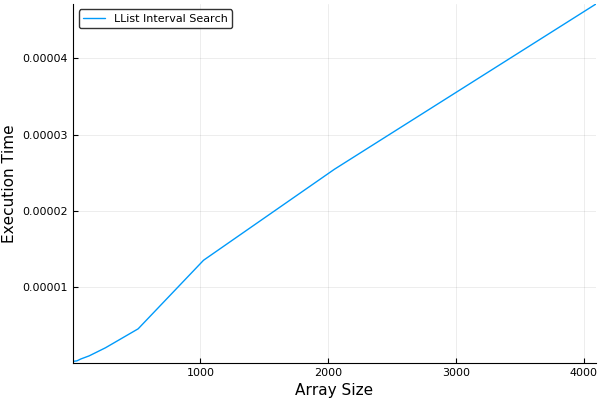

In [42]:
#### intervalmembership defined in functions.jl ####

# Compilation step
intervalmembership(generate_cumulative_llist(8,rng)[1], rand())

# Setting parameters
repetitions = 100
times_brute = Array(Float64, 0)
repetition_times = zeros(repetitions)

for size in width
    ### Loop over sizes
    for i in 1:repetitions
        ### Loop over repetitions
        
        # Generate intervals
        llist, cumsum = generate_cumulative_llist(size, rng)

        # Get the time for the search, given random value in range
        to_search = rand()*cumsum[end]
        tmp = @timed intervalmembership(llist, to_search)
                
        # Add to times array
        repetition_times[i] = tmp[2]
    end
    # Save the averages of executions for a given size
    push!( times_brute, mean(repetition_times))
end

x = width
Plots.plot(x, times_brute, 
    label="LList Interval Search",
    xlabel="Array Size",
    ylabel="Execution Time"
)

**3)** The file FTree.jl defines a data structure implementing a variant of a Fenwick tree that can solve the interval membership problem as described in the lectures/notes. The function 

$$\text{buildFTree(T::Nullable{FTree}, dataArray::Array{KVPair, 1})}$$

takes the array of KVPairs containing the interval lengths as input, recursively constructs the tree and returns the FTree containing the correct key-value pairs (note a key of -1 is assigned to all non-leaf nodes).

Write a recursive function

$$\text{intervalmembership(FT::Nullable{FTree}, x::Float64)}$$

that takes the FTree containing the list of partial sums and a random Float64 in the range $[0, x_n]$ as 
inputs and returns the KVPair corresponding to the interval in which $x$ lies. Verify that it works for small values of $n$ and use Julia's @timed macro to compare how the typical computational compares to the above linear search version. Note it can sometimes be difficult to directly measure $O(\log\, n)$ growth in computation time since the problem size needs to become very large to register appreciable run times.

In [12]:
n=5
X1 = rand(rng, 5)
# Now calculate the array of partial sums
values = Array{KVPair}(5)
for i in 1:n
    values[i] = KVPair(i,X1[i])
end
T = Nullable{FTree}(FTree(KVPair(0,0.0)))
T=buildFTree(T, values)

Nullable{FTree}(FTree(KVPair(-1, 2.03798), FTree(KVPair(-1, 0.419524), FTree(KVPair(1, 0.238817), #NULL, #NULL), FTree(KVPair(2, 0.180708), #NULL, #NULL)), FTree(KVPair(-1, 1.61846), FTree(KVPair(3, 0.630896), #NULL, #NULL), FTree(KVPair(-1, 0.987563), FTree(KVPair(4, 0.268177), #NULL, #NULL), FTree(KVPair(5, 0.719386), #NULL, #NULL)))))

In [13]:
function intervalmembership(FT::Nullable{FTree}, x::Float64)

    node = get(FT)
    
    if isnull(node.left) && isnull(node.right)
        return node.data
    else
        if x <= get(node.left).data.value
            return intervalmembership(node.left, x)
        else
            return intervalmembership(node.right, x-get(node.left).data.value)
        end
    end
    
end

intervalmembership(T, 0.053)

KVPair(1, 0.23881672289989253)

## Question 3: Gillespie algorithm for heterogeneous diffusion

The Gillespie algorithm is a dynamic Monte Carlo algorithm that generates statistically correct realisations of a continous time Markov process. See https://en.wikipedia.org/wiki/Gillespie_algorithm It is used heavily in stochastic simulation of chemical and biological reaction networks and population dynamics. In this question we use it to simulate one-dimensional diffusion of heterogeneous particles whose diffusion constants are independently drawn from an exponential distribution.

The basic idea of the algorithm is as follows
1. Create a list $\left\{(i, r_i), i=1,\ldots M\right\}$,  of all possible transitions (events), $i$, that can occur in the system and the corresponding transition rates, $r_i$.
2. Calculate the total rate
$$R = \sum_{i=1}^M r_i$$
and divide the interval $[0, R]$ into $M$ intervals whose lengths are given by the $r_i$.
3. Generate a uniform random number in the range $[0,R]$ and determine which interval it falls in. 
4. Perform the corresponding transition and update the time variable by an amount $\Delta t = 1/R$.
5. Repeat until the desired simulation time is reached.

To be concrete, suppose with have $N$ particles on the interval $[-L, L]$ initially located at $x=0$. Each particle can hop a distance $\Delta x$ to the left or to the right with equal probability. The rate of hopping is initially considered to be the same for all particles:

$$ r_i = \frac{D}{2}\,\frac{1}{(\Delta x)^2} $$

This choice ensures that in the continous limit ($\Delta x \to 0$, $N\to \infty$), the density of particles $c(x,t)$ on the line will satisfy the usual diffusion equation with diffusion coefficient $D$ (recall MA933):

$$ \frac{\partial c}{\partial t} = D \frac{\partial^2 c}{\partial x^2}$$

with initial condition $c(x,0) = \delta(x)$.

The steps of the algorithm then correspond to the following:
1. There are $M= 2 N$ possible transitions at each step: each of $N$ particles can hop a distance $\Delta x$ either left or right with the above rates. We index them as follows: events k=1:N correspond to particle k hopping to the right, events k=N+1:2N correspond to particle k-N hopping to the left.
2. The total rate is 
$$ R = \frac{D N}{(\Delta x)^2}.$$
3. Generate a uniform random number in the range $[0,R]$ and determine the index $k$ of particle to move and the direction.
4. Update the position of particle $k$ accordingly.
5. Repeat.

The following piece of code implements the Gillespie algorithm for N=100, L=10, $\Delta x = 0.1$ and $D=1$, converts the particle positions to particle density and compares to the solution of the diffusion equation on an unbounded domain at t=1 (we assume that L=10 is far enough from zero to be considered unbounded):

$$c(x, t) = \frac{1}{\sqrt{2 \pi D t}}\, \exp [-\frac{1}{2}\frac{x^2}{D t} ]$$

**1)** The code above makes critical use of the fact that all intervals have the same width in order to decide which particle to move at each step. Suppose now that instead of being equal to $D$ for each particle, the diffusion coefficients are drawn from an exponential distribution with mean $D$:

$$ P(x) = \frac{1}{D} \exp\left(-\frac{x}{D}\right). $$

Modify the code to account for this, using your code from Q2 above to solve the interval membership problem using linear search. You will need to use Julia's randexp() function to generate values for the diffusion coefficients. What is the largest value of $N$ you can simulate in a "reasonable" time?

In [14]:
function modified(N)
    L=10.0
    Nx = 201
    dx = 2.0*L/(Nx-1)
    X = dx.*(-(Nx-1)/2:(Nx-1)/2)
    Y =zeros(Int64,N)
    D = 1.0
    t=0.0

    Drates = randexp(rng,N)#generate rand number
    Drates = [Drates;Drates]
    rates = Drates/2 * 1/(dx^2)
    cum_rates = cumsum(rates)
    rates_intervals = buildLList(KVPair.( 1:2*N, cum_rates ) )

    
    totalRate = sum(rates)

    dt = 1.0/totalRate
    T=1.0

    # This is the main loop

    while t < T

        # Pick an event
        rate_to_find = rand()* totalRate     
        node = intervalmembership(rates_intervals, rate_to_find) #find the location
        k = node.key  #return the key of location
        if k<=N
            hop = 1
            particleId = k
        else
            hop = -1
            particleId=k-N
        end
        Y[particleId]+=hop
        t+=dt
    end


    # Calculate the estimated density of particles
    P =zeros(Float64,length(X))
    for i in 1:length(Y)
        P[Y[i]+Int64((Nx-1)/2)+1]+=1/(N * dx)
    end

    # Calculate the theoretical density and compare
    function normal(x, D, t)
        return exp( -sqrt(2 / (D*t) ) * abs(x) ) / sqrt( 2*D*t )
#         return (1.0/sqrt(2.0*pi*D*t))*exp(-x*x/(2*D*t))
    end
    
    P1 = normal.(X, D, T)
    return X,P1,P
#     plot(X, P1, label="Analytic solution of diffusion equation")
#     plot!(X, P, label="Numerical estimate of particle density")
#     xlabel!("x")
#     ylabel!("Particle density, c(x,t)")
#     title!("Stochastic simulation of simple diffusion in 1-D")
end


modified (generic function with 1 method)


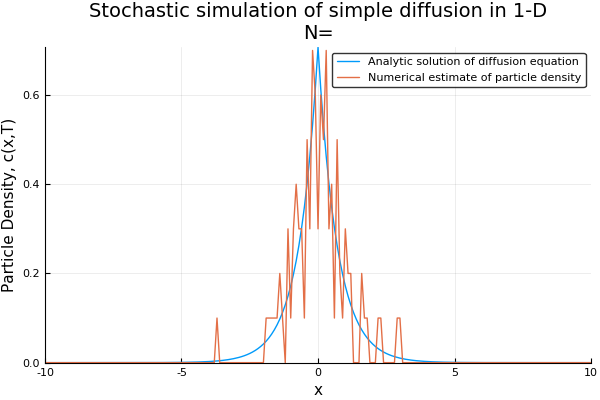

In [15]:
N=100

X,P1,P = modified(N)

plot(X, P1, label="Analytic solution of diffusion equation", xlabel="x",ylabel="Particle Density, c(x,T)",;
    title="Stochastic simulation of simple diffusion in 1-D\nN=")
plot!(X, P, label="Numerical estimate of particle density")


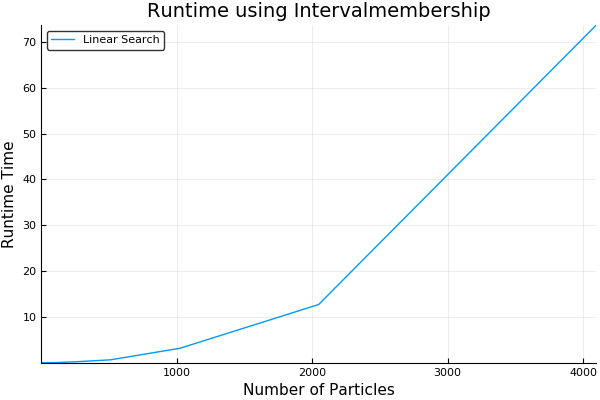

In [16]:
times = []
for i = 1:12
    push!(times, @timed( modified(2^i))[2] )
end

plot(2.^(1:12), times, xlabel="Number of Particles", ylabel="Runtime Time", title="Runtime using Intervalmembership",label="Linear Search")

Running Time increases exponentially from 2000 particles, and I think this is the starting point we could say "unreasonable time" for simulation. 

**2)** Try again using your Fenwick tree from Q2 to solve the interval membership problem and compare. What is the largest value of $N$ you can simulate now?

In [17]:
function modified_FT(N)
    L=10.0
    Nx = 201
    dx = 2.0*L/(Nx-1)
    X = dx.*(-(Nx-1)/2:(Nx-1)/2)
    Y =zeros(Int64,N)
    D = 1.0
    t=0.0

    Drates = randexp(rng,N)#generate rand number
    Drates = [Drates; Drates]
    rates = Drates/2 * 1/(dx^2)
    totalRate = sum(rates)

    rate_to_find = rand()* totalRate    
    rates_FT = Nullable{FTree}(FTree(KVPair(0,0)))
    rates_FT = buildFTree(rates_FT, KVPair.( 1:2*N, rates ) )


    dt = 1.0/totalRate
    T=1.0

    # This is the main loop
    while t < T
        # Pick an event
        rate_to_find = Float64(rand(Uniform(0,totalRate)))    
        node = intervalmembership(rates_FT, rate_to_find) #find the location
        k = node.key  #return the key of location
        if k<=N
            hop = 1
            particleId = k
        else
            hop = -1
            particleId=k-N
        end
        Y[particleId]+=hop
        t+=dt
    end

    # Calculate the estimated density of particles
    P =zeros(Float64,length(X))
    for i in 1:length(Y)
        P[Y[i]+Int64((Nx-1)/2)+1]+=1/(N * dx)
    end

    # Calculate the theoretical density and compare
    function normal(x, D, t)
        return exp( -sqrt(2 / (D*t) ) * abs(x) ) / sqrt( 2*D*t )
    end
    P1 = normal.(X, D, T)
    return X,P1,P
#     plot(X, P1, label="Analytic solution of diffusion equation")
#     plot!(X, P, label="Numerical estimate of particle density")
#     xlabel!("x")
#     ylabel!("Particle density, c(x,t)")
#     title!("Stochastic simulation of simple diffusion in 1-D")
end

modified_FT (generic function with 1 method)


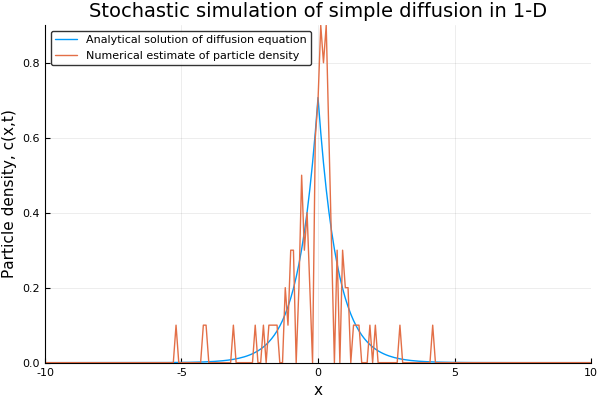

In [18]:
N=100
X,P1,P = modified_FT(N)

plot(X, P1, label="Analytical solution of diffusion equation")
plot!(X, P, label="Numerical estimate of particle density")
xlabel!("x")
ylabel!("Particle density, c(x,t)")
title!("Stochastic simulation of simple diffusion in 1-D")


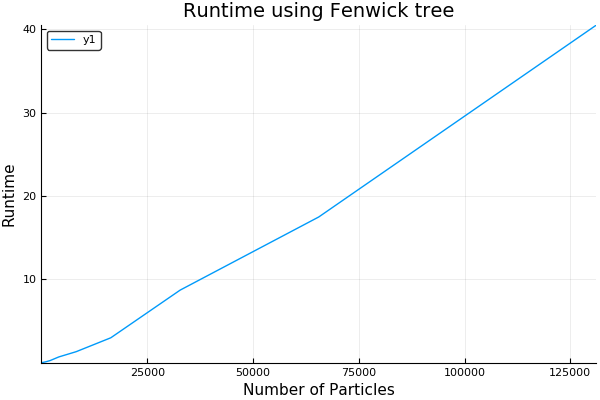

In [19]:
times = []
for i in 1:17
    push!(times, @timed( modified_FT(2^i) )[2] )
end

plot(2.^(1:17), times, xlabel="Number of Particles", ylabel="Runtime", title="Runtime using Fenwick tree")

Compared to LinearSearch, running time does not exceed 60 seconds even if the number of particles over 125000.

**3)** Show analytically that the solution of the heterogenous diffusion problem is

$$ c(x,t) = \frac{\exp \left(-\sqrt{\frac{2}{D\,t}}\, |x| \right)}{\sqrt{2\, D\, t}}$$

You will probably need the integral formula (Formula 3.325 of Gradshteyn and Rizhik, 7th Ed.)

$$ \int_0^\infty \exp\left(-a\,x^2 - \frac{b}{x^2} \right)\, dx =  \frac{1}{2}\,\sqrt{\frac{\pi}{a}}\,\exp\left(-2 \sqrt{a\,b} \right).$$
Use this formula to validate your numerical results.

**Answer**

Diffusion equation is

$$ \frac{\partial c}{\partial t} =  D\frac{\partial^2 c}{\partial x^2} $$

and $c(x,t)$ is the density of particles at $x$ at $t$. 
We find that diffusion coefficient is sampled from a exponential distribution, by taking each particle separately.  
$$D_(x) \ \textit{~} \ \frac{1}{D} \exp({\frac{-x}{D}})$$

Therefore, given a fixed time $t$, 

$$ \langle c(x,t) \rangle = \int_{0}^{\infty} dy \frac{1}{D} \exp( \frac{-y}{D} ) \frac{1}{\sqrt{2\pi yt}} \exp( \frac{-x^2}{4yt}) $$ 

Substitute $z^2 = y$, then  $ 2z\ dz = dy$ then,

$$ = \frac{2}{\sqrt{2\pi t}} \frac{1}{D} \int_{-\infty}^{\infty} dz\  \exp( \frac{-z^2}{D} )  \exp( \frac{-x^2}{4z^2t}) $$

We can divide the integral into two, 

$$ \frac{4}{\sqrt{2\pi t}} \frac{1}{D} \int_{0}^{\infty} dz\  \exp( \frac{-z^2}{D} )  \exp( \frac{-x^2}{4z^2t}) $$

Using the integral formula (Formula 3.325 of Gradshteyn and Rizhik, 7th Ed.), $a=\frac{1}{D}$, $b=\frac{x^2}{4t}$.

Use this to get the final answer,

$$  \frac{1}{2} \sqrt{\pi D} \frac{1}{\sqrt{2 \pi t}} \frac{1}{D} \exp(-2 \sqrt{ \frac{x^2}{4tD} } )  $$

Therefore,

$$ \langle c(x,t) \rangle = \frac{\sqrt{D}}{2D\sqrt{2 t}} \ \exp(-2 \sqrt{ \frac{x^2}{4tD} } )$$
